# PySESync: SE-Sync Python bindings 🐍

This notebook demonstrates the use of SE-Sync's Python bindings

In [17]:
import sys
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import collections as mc
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import matplotlib.animation as animation

%matplotlib notebook

Import the SE-Sync Python library built using pybind

In [18]:
import PySESync

Load in some data from a .g2o file

In [19]:
filename = "../../data/intel.g2o"
#filename = "../../data/parking-garage.g2o"


measurements, num_poses = PySESync.read_g2o_file(filename)

d = measurements[0].R.shape[0]

print("Loaded %d measurements between %d %d-dimensional poses from file %s" % (len(measurements), num_poses, d, filename))

Loaded 2512 measurements between 1728 2-dimensional poses from file ../../data/intel.g2o


### Run SE-Sync!

Set SE-Sync options

In [20]:
opts = PySESync.SESyncOpts()
opts.num_threads = 4
opts.verbose=True

opts.r0 = d
opts.formulation = PySESync.Formulation.Explicit    # Options are Simplified or Explicit
opts.initialization = PySESync.Initialization.Random   # Options are Chordal or Random

# Termination criteria
opts.rel_func_decrease_tol = 1e-6
opts.min_eig_num_tol = 1e-3
opts.max_time = 900

# We will record the sequence of iterates generated by the SE-Sync algorithm as it runs,
# in order to generate an animation of the solution process
opts.log_iterates = True


# Save the solution animation to a video file?
save_animation = False

Run SE-Sync!

In [21]:
result = PySESync.SESync(measurements, opts)

Constructing SE-Sync problem instance ... elapsed computation time: 0.017 seconds

========= SE-Sync ==========

ALGORITHM SETTINGS:

SE-Sync settings:
 SE-Sync problem formulation: Explicit
 Initial level of Riemannian staircase: 2
 Maximum level of Riemannian staircase: 10
 Tolerance for accepting an eigenvalue as numerically nonnegative in optimality verification: 0.001
 LOBPCG block size: 4
 LOBPCG preconditioner maximum fill factor: 3
 LOBPCG preconditioner drop tolerance: 0.001
 Maximum number of LOBPCG iterations for escape direction computation: 100
 Initialization method: random
 Logging entire sequence of Riemannian Staircase iterates
 Running SE-Sync with 4 threads

Riemannian trust-region settings:
 Stopping tolerance for norm of Riemannian gradient: 0.01
 Stopping tolerance for norm of preconditioned Riemannian gradient: 0.0001
 Stopping tolerance for relative function decrease: 1e-06
 Stopping tolerance for the norm of an accepted update step: 0.001
 Maximum number of tru

Iter:   33, time: 1.500e-01, f:  9.445e+05, |g|: 1.574e+04, |M^{-1}g|: 1.724e+04, Delta: 2.328e+02, inner iters:     5, |h|: 7.586e+02, |h|_M: 2.328e+02, df: -1.371e+05, rho: -6.558e-01. Step REJECTED!
Iter:   34, time: 1.590e-01, f:  9.445e+05, |g|: 1.574e+04, |M^{-1}g|: 1.724e+04, Delta: 5.821e+01, inner iters:     3, |h|: 3.092e+02, |h|_M: 5.821e+01, df:  6.602e+04, rho:  8.591e-01. Step accepted
Iter:   35, time: 1.650e-01, f:  8.785e+05, |g|: 1.326e+04, |M^{-1}g|: 1.152e+04, Delta: 5.821e+01, inner iters:     4, |h|: 1.533e+02, |h|_M: 5.821e+01, df:  2.652e+04, rho:  7.397e-01. Step accepted
Iter:   36, time: 1.730e-01, f:  8.520e+05, |g|: 1.099e+04, |M^{-1}g|: 7.988e+03, Delta: 5.821e+01, inner iters:     4, |h|: 1.216e+02, |h|_M: 5.821e+01, df:  2.817e+04, rho:  9.474e-01. Step accepted
Iter:   37, time: 1.810e-01, f:  8.238e+05, |g|: 8.726e+03, |M^{-1}g|: 6.587e+03, Delta: 1.455e+02, inner iters:     6, |h|: 1.398e+02, |h|_M: 1.455e+02, df:  2.071e+04, rho:  5.533e-01. Step acc

Iter:   74, time: 2.035e+00, f:  7.728e+05, |g|: 7.600e+01, |M^{-1}g|: 4.026e+01, Delta: 5.170e+01, inner iters:    33, |h|: 1.456e+00, |h|_M: 3.420e+00, df:  5.831e+00, rho:  1.002e+00. Step accepted
Iter:   75, time: 2.070e+00, f:  7.728e+05, |g|: 8.890e+00, |M^{-1}g|: 3.456e+00, Delta: 5.170e+01, inner iters:    95, |h|: 1.237e+01, |h|_M: 5.170e+01, df: -1.362e+00, rho: -3.155e-01. Step REJECTED!
Iter:   76, time: 2.162e+00, f:  7.728e+05, |g|: 8.890e+00, |M^{-1}g|: 3.456e+00, Delta: 1.292e+01, inner iters:    65, |h|: 2.625e+00, |h|_M: 1.292e+01, df:  1.409e+00, rho:  9.951e-01. Step accepted
Iter:   77, time: 2.221e+00, f:  7.728e+05, |g|: 1.201e+01, |M^{-1}g|: 1.054e+01, Delta: 3.231e+01, inner iters:    79, |h|: 8.305e+00, |h|_M: 3.231e+01, df:  1.738e+00, rho:  5.529e-01. Step accepted
Iter:   78, time: 2.292e+00, f:  7.728e+05, |g|: 4.367e+01, |M^{-1}g|: 3.626e+01, Delta: 3.231e+01, inner iters:    71, |h|: 2.428e+00, |h|_M: 1.072e+01, df:  4.333e+00, rho:  1.032e+00. Step acc

Iter:   26, time: 3.120e-01, f:  1.445e+03, |g|: 1.677e+02, |M^{-1}g|: 4.265e+02, Delta: 2.384e+01, inner iters:    15, |h|: 1.391e+02, |h|_M: 2.384e+01, df: -4.067e+03, rho: -2.549e+01. Step REJECTED!
Iter:   27, time: 3.370e-01, f:  1.445e+03, |g|: 1.677e+02, |M^{-1}g|: 4.265e+02, Delta: 5.960e+00, inner iters:     8, |h|: 3.269e+01, |h|_M: 5.960e+00, df:  5.799e+01, rho:  9.100e-01. Step accepted
Iter:   28, time: 3.520e-01, f:  1.387e+03, |g|: 1.863e+02, |M^{-1}g|: 7.014e+02, Delta: 1.490e+01, inner iters:    13, |h|: 1.025e+02, |h|_M: 1.490e+01, df: -1.242e+02, rho: -1.193e+00. Step REJECTED!
Iter:   29, time: 3.750e-01, f:  1.387e+03, |g|: 1.863e+02, |M^{-1}g|: 7.014e+02, Delta: 3.725e+00, inner iters:     8, |h|: 2.413e+01, |h|_M: 3.725e+00, df:  5.405e+01, rho:  1.075e+00. Step accepted
Iter:   30, time: 3.890e-01, f:  1.333e+03, |g|: 9.123e+01, |M^{-1}g|: 1.968e+02, Delta: 9.313e+00, inner iters:     9, |h|: 6.004e+01, |h|_M: 9.313e+00, df:  2.200e+00, rho:  3.554e-02. Step RE

Iter:   67, time: 1.020e+00, f:  8.248e+02, |g|: 5.452e+01, |M^{-1}g|: 1.283e+02, Delta: 6.265e+00, inner iters:    13, |h|: 4.762e+01, |h|_M: 6.265e+00, df: -3.681e+01, rho: -2.283e+00. Step REJECTED!
Iter:   68, time: 1.039e+00, f:  8.248e+02, |g|: 5.452e+01, |M^{-1}g|: 1.283e+02, Delta: 1.566e+00, inner iters:     7, |h|: 1.040e+01, |h|_M: 1.566e+00, df:  6.416e+00, rho:  1.023e+00. Step accepted
Iter:   69, time: 1.051e+00, f:  8.183e+02, |g|: 4.260e+01, |M^{-1}g|: 1.564e+02, Delta: 3.916e+00, inner iters:    10, |h|: 2.940e+01, |h|_M: 3.916e+00, df:  6.167e+00, rho:  6.139e-01. Step accepted
Iter:   70, time: 1.068e+00, f:  8.122e+02, |g|: 1.042e+02, |M^{-1}g|: 5.656e+02, Delta: 3.916e+00, inner iters:     4, |h|: 2.608e+00, |h|_M: 4.212e-01, df:  8.592e+00, rho:  1.008e+00. Step accepted
Iter:   71, time: 1.077e+00, f:  8.036e+02, |g|: 2.741e+01, |M^{-1}g|: 4.400e+01, Delta: 3.916e+00, inner iters:     8, |h|: 2.951e+01, |h|_M: 3.916e+00, df: -1.300e+01, rho: -1.763e+00. Step REJ

Iter:   16, time: 2.830e-01, f:  5.245e+01, |g|: 3.625e+00, |M^{-1}g|: 5.490e+00, Delta: 4.436e+00, inner iters:    24, |h|: 4.445e+00, |h|_M: 4.563e-01, df:  9.061e-02, rho:  9.772e-01. Step accepted
Iter:   17, time: 3.210e-01, f:  5.236e+01, |g|: 2.651e+00, |M^{-1}g|: 1.023e+01, Delta: 4.436e+00, inner iters:     4, |h|: 6.542e-02, |h|_M: 9.802e-03, df:  6.600e-03, rho:  1.000e+00. Step accepted
Iter:   18, time: 3.320e-01, f:  5.235e+01, |g|: 4.275e-01, |M^{-1}g|: 7.895e-01, Delta: 4.436e+00, inner iters:    24, |h|: 3.092e-01, |h|_M: 3.523e-02, df:  7.424e-04, rho:  1.000e+00. Step accepted
Iter:   19, time: 3.700e-01, f:  5.235e+01, |g|: 4.473e-02, |M^{-1}g|: 5.769e-02, Delta: 4.436e+00, inner iters:    21, |h|: 1.494e-02, |h|_M: 1.955e-03, df:  4.150e-06, rho:  1.000e+00. Step accepted

Optimization finished!
Algorithm terminated due to insufficient relative decrease: 7.927e-08 < 1.000e-06
Final objective value: 5.235e+01
Norm of Riemannian gradient: 4.473e-02
Norm of preconditi

## Plot some interesting data about the solution process

<IPython.core.display.Javascript object>


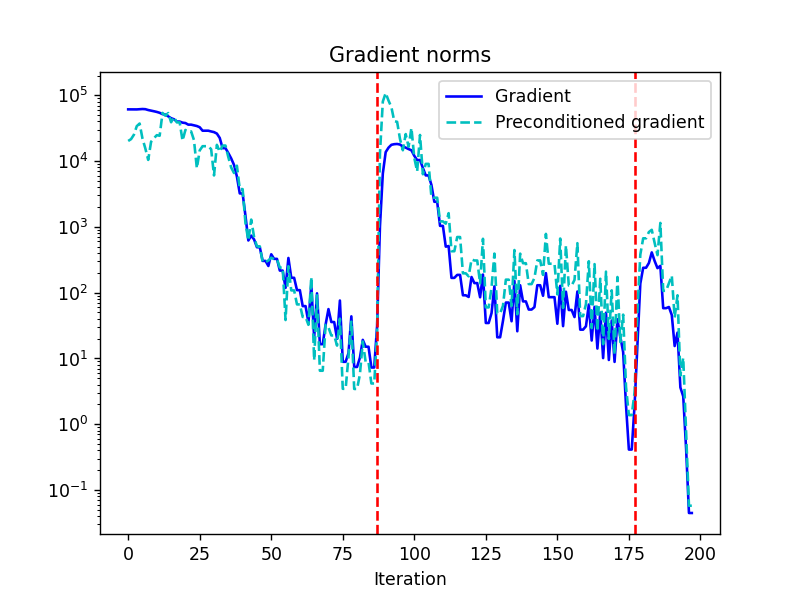

In [22]:
# Plot sequence of Riemannian gradient norms
fig, ax = plt.subplots()
# Extract sequences of gradient and preconditioned gradient norms
grad_norms = np.concatenate(result.gradient_norms)
precon_grad_norms = np.concatenate(result.preconditioned_gradient_norms)

# Plot these sequences
plt.semilogy(grad_norms, '-b')
plt.semilogy(precon_grad_norms, '--c')
plt.legend(['Gradient', 'Preconditioned gradient'])

# Set the following flag to "True" in order to draw red vertical 
# lines indicating iterations at which the relaxation rank 
# increased in the Riemannian Staircase
show_rank_increases = True

if show_rank_increases and len(result.gradient_norms) > 1:
    steps = np.cumsum([len(l) for l in result.gradient_norms[:-1]])
    for i in steps:
        plt.axvline(x=i, ymin=0, ymax=np.log10(grad_norms.max()), color='red', linestyle='--')

plt.title("Gradient norms")
plt.xlabel("Iteration")

plt.show()

<IPython.core.display.Javascript object>


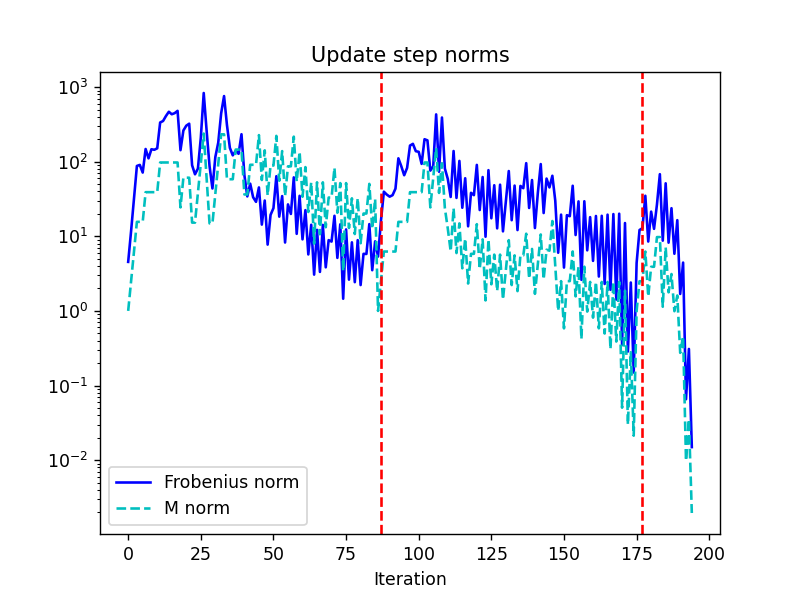

In [23]:
# Plot sequence of update step norms
fig, ax = plt.subplots()
# Extract sequences of gradient and preconditioned gradient norms
update_step_norms = np.concatenate(result.update_step_norms)
update_step_M_norms = np.concatenate(result.update_step_M_norms)

# Plot these sequences
plt.semilogy(update_step_norms, '-b')
plt.semilogy(update_step_M_norms, '--c')
plt.legend(['Frobenius norm', 'M norm'])

# Set the following flag to "True" in order to draw red vertical 
# lines indicating iterations at which the relaxation rank 
# increased in the Riemannian Staircase
show_rank_increases = True

if show_rank_increases and len(result.gradient_norms) > 1:
    steps = np.cumsum([len(l) for l in result.gradient_norms[:-1]])
    for i in steps:
        plt.axvline(x=i, ymin=0, ymax=np.log10(grad_norms.max()), color='red', linestyle='--')

plt.title("Update step norms")
plt.xlabel("Iteration")

plt.show()

<IPython.core.display.Javascript object>


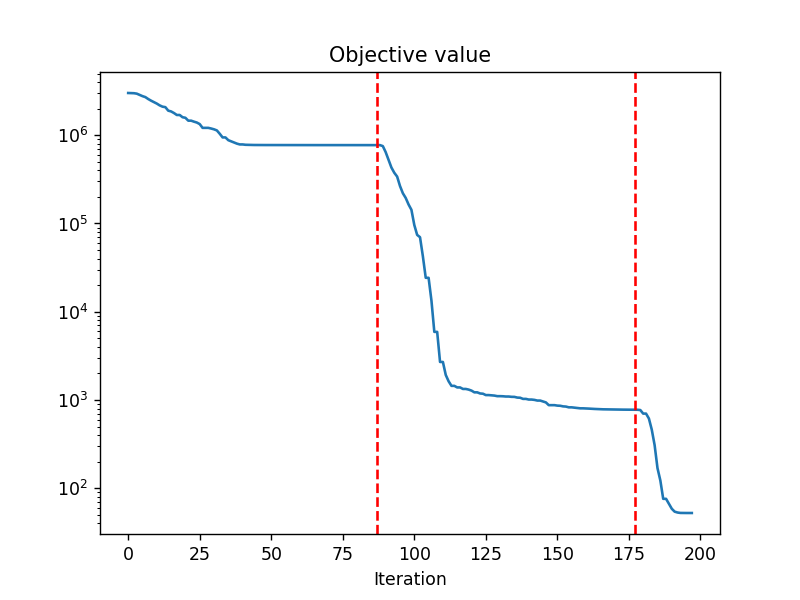

In [24]:
# Plot sequence of objective values
fig, ax = plt.subplots()
fvals = np.concatenate(result.function_values)
plt.semilogy(fvals)

# Set the following flag to "True" in order to draw red vertical 
# lines indicating iterations at which the relaxation rank 
# increased in the Riemannian Staircase
show_rank_increases = True

if show_rank_increases and len(result.function_values) > 1:
    steps = np.cumsum([len(l) for l in result.function_values[:-1]])
    for i in steps:
        plt.axvline(x=i, ymin=0, ymax=np.log10(fvals.max()), color='red', linestyle='--')


plt.title("Objective value")
plt.xlabel("Iteration")
plt.show()

### Plot estimated SLAM solution

Define some useful functions for visualizing SLAM solution

In [25]:
# Given a list of position estimates and a collection of measurements, this function constructs a list of
# pairs of the form (ti, tj), where ti and tj are the endpoints of a relative pose measurement
def construct_line_segments(t, measurements):
    lines = []
    
    for m in measurements:
        lines.append((t[:,m.i], t[:,m.j]))
    
    return lines

# Given an SESyncProblem instance, a low-rank factor Y for an estimated SDP solution X = YY', this function
# returns the rounded (projected) position estimates t
def get_rounded_position_estimates(prob, Y):
    # Get problem dimensions
    d = prob.dimension()
    n = prob.num_states()
    
    # Get relaxtion rank for the passed estimate Y
    r = Y.shape[0]
    
    # Compute rounded pose estimates
    xhat = prob.round_solution(Y)
    
    # Extract rotational and translational parts
    R0 = xhat[:, n : n + d]
    R0inv = R0.transpose()
    return np.matmul(R0inv, xhat[:, 0:n])

Plot the final SLAM estimate

<IPython.core.display.Javascript object>


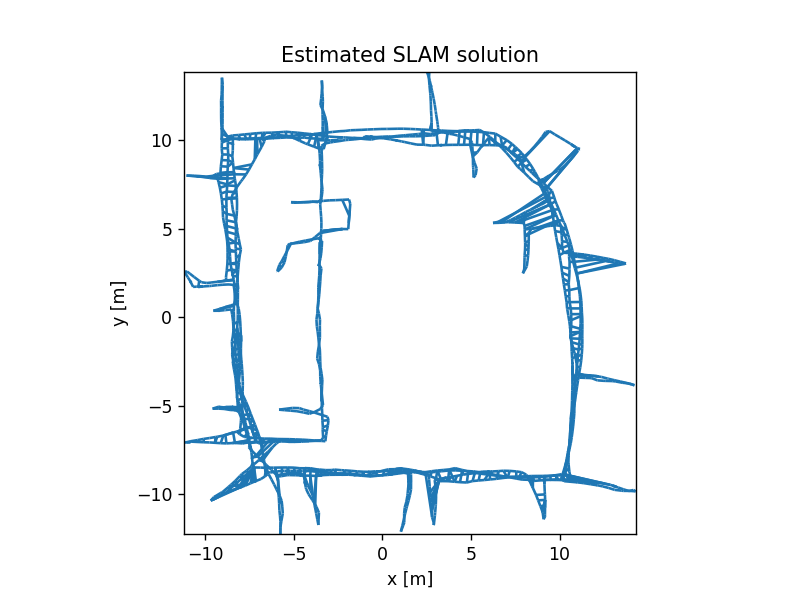

In [26]:
# Extract translational states from solution xhat
xhat = result.xhat
R0inv = np.linalg.inv(xhat[:, num_poses : num_poses + d])
t = np.matmul(R0inv, xhat[:, 0:num_poses])

# Construct set of inter-pose measurements at the estimated robot positions
lines = construct_line_segments(t, measurements)

# Determine dimension of problem

# Plot the estimated solution
fig = plt.figure()

if d == 2:
    ax = plt.gca()
    ax.set_xlim(t[0, :].min(), t[0, :].max())
    ax.set_ylim(t[1, :].min(), t[1, :].max())
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")
    
    lc = mc.LineCollection(lines)
    ax.add_collection(lc)
    ax.set_aspect('equal')

else:
    # d == 3
    ax = fig.add_subplot(projection='3d')
    ax.set_xlim(t[0, :].min(), t[0, :].max())
    ax.set_ylim(t[1, :].min(), t[1, :].max())
    ax.set_zlim(t[2, :].min(), t[2, :].max())
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")
    ax.set_zlabel("z [m]")
    
    lc = Line3DCollection(lines)
    ax.add_collection3d(lc)
    ax.set_box_aspect((1,1,1))

plt.title("Estimated SLAM solution")
plt.show()

### Generate a video of the solution process

Compute rounded position estimates for each iterate generated during the entire optimization

In [27]:
# Construct SE-Sync problem instance
prob = PySESync.SESyncProblem(measurements, opts.formulation, opts.projection_factorization, \
                              opts.preconditioner, opts.reg_Chol_precon_max_cond)

# Record maximum and minimum x- and y- values of each estimated position; we will use these later
# to set the figure axis ranges
xmax = -float('inf')
xmin = float('inf')
ymax = -float('inf')
ymin = float('inf')
zmax = -float('inf')
zmin = float('inf')


# Construct a list of line collections, one for each estimated (rounded) solution
solns = []
for Ys in result.iterates:
    for Y in Ys:
        # Get rounded position estimates
        t = get_rounded_position_estimates(prob, Y)
        
        # Update maximum and minimum x- and y- values
        xmax = max(xmax, t[0, :].max())
        xmin = min(xmin, t[0, :].min())
        ymax = max(ymax, t[1, :].max())
        ymin = min(ymin, t[1, :].min())
        
        if d == 3:
            # Also record zmax and zmin values
            zmax = max(zmax, t[2, :].max())
            zmin = min(zmin, t[2, :].min())

        # Calculate the set of segments for this solution
        solns.append(construct_line_segments(t, measurements))

Render visualization!

<IPython.core.display.Javascript object>


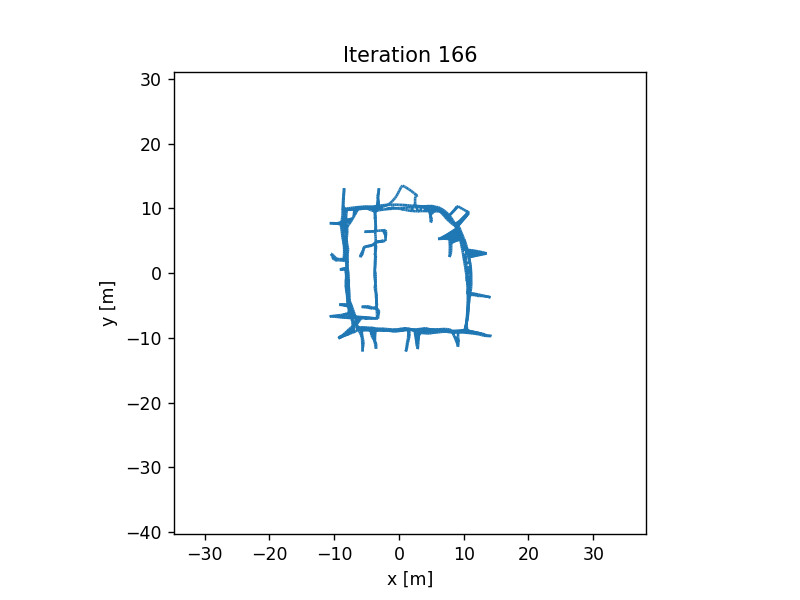

In [28]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()

if d == 2:
    # Construct set of 2D axes
    ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax))
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")
    ax.set_aspect('equal')

    # Initialize line collection and add it to the figure
    lc = mc.LineCollection([])
    ax.add_collection(lc)
    
else:
    # Construct set of 3D axes
    ax = fig.add_subplot(projection='3d')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_zlim(zmin, zmax)
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")
    ax.set_zlabel("z [m]")
    ax.set_box_aspect((1,1,1))
    
    # Initialize line collection and add it to the figure
    lc = Line3DCollection([])
    ax.add_collection3d(lc)
    


# Initialization function: plot the background of each frame
def init():
    lc.set_segments([])
    return lc

# Animation function.  This is called sequentially
def update(i):
    lc.set_segments(solns[i])
    ax.set_title("Iteration %d" % i)
    return lc

# Call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, update, init_func=init, frames=len(solns), interval=67)

if save_animation:
    # Save this animation to disk
    writer = animation.FFMpegWriter(fps = 15, codec='ffv1')
    anim.save('SESync.avi', writer=writer)